In [1]:
import h5py

In [2]:
import numpy as np

In [3]:
def load_dataset():
    train_dataset = h5py.File('Downloads/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('Downloads/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [4]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

In [5]:
train_set_x_orig.shape # no.of_images, R,G,B

(209, 64, 64, 3)

In [6]:
train_set_y_orig.shape

(1, 209)

In [7]:
import matplotlib.pyplot as plt

given picture is [b'non-cat']


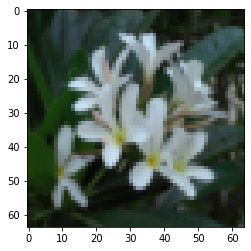

In [8]:
index = 28
plt.imshow(train_set_x_orig[index])
print("given picture is", classes[train_set_y_orig[:,index]])

given picture is [b'non-cat']


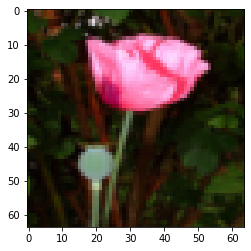

In [9]:
plt.imshow(train_set_x_orig[30])
print("given picture is", classes[train_set_y_orig[:,30]])

In [10]:
print("Number of training examples\t", train_set_x_orig.shape[0])
print("Number of test examples \t", test_set_x_orig.shape[0])

Number of training examples	 209
Number of test examples 	 50


Converting image matrices into a single matrix of size (# of features, # of examples)

features = R,G,B

In [11]:
train_set_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [12]:
train_set_flatten.shape

(12288, 209)

In [13]:
test_set_flatten.shape

(12288, 50)

Normalising the images by dividing each pixel value by 255

In [14]:
train_set_x = train_set_flatten/255
test_set_x = test_set_flatten/255

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-1))

In [16]:
def initialization(no_of_feature):
    w = np.zeros((no_of_feature,1))
    b = 0
    
    return w, b

In [17]:
def backpropogation(w, b, X, Y):
    """to compute cost, dw and db"""
    
    Y_hat = sigmoid(np.dot(w.T,X) + b)
    
    cost  = -(np.mean((1-Y)* np.log(1-Y_hat) + Y * np.log(Y_hat)))
    
    dw = (1/X.shape[1])*(np.dot(X,(Y_hat - Y).T))
    
    db = np.mean(Y_hat-Y)
    
    return dw, db, cost

In [18]:
def optimization(w, b, X, Y, num_iterations, Learning_rate, print_cost):
    
    costs = []
    
    for i in range(num_iterations):
        
        dw, db, cost = backpropogation(w, b, X, Y)
        
        w = w - Learning_rate * dw
        
        b = b - Learning_rate * db
        
        if i%100 == 0:
            costs.append(cost)
        
        if print_cost and i%100 == 0:
            print("cost after", i, "iterations is", cost)
            
    print("w:\t", w,'\n',"b:\t", b,'\n')
    print("dw:\t", dw,'\n',"db:\t", db,'\n')
    
    return w, b

In [19]:
def predict(w, b, X_test):
    
    Y_predict = np.zeros((1,X_test.shape[1]))
    
    A = sigmoid(w.T.dot(X_test) + b)
    
    for i in range(X_test.shape[1]):
        
        if A <= 0.5:
            Y_predict[0,i] = 0
        else:
            Y_predict[0,i] = 1
    
    return Y_predict

In [20]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, Learning_rate, print_cost):
    
    w, b = initialization(X_train.shape[0]) #No. of features = No. of rows
    
    w, b = optimization(w, b, X_train, Y_train, num_iterations, Learning_rate, print_cost)
    
    Y_predict_train = predict(w, b, X_train)
    
    Y_predict_test = predict(w, b, X_test)
    
    print("Train accuracy", np.mean(Y_predict_train == train_set_y_orig))
    
    print("Test accuracy", np.mean(Y_predict_test == test_set_y_orig))
    
    predictions = {"train": Y_predict_train,
                   "test": Y_predict_test}
    
    return predictions 

In [36]:
pred = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, 20000, 0.001, True)

cost after 0 iterations is 0.9687640798627203
cost after 100 iterations is 0.9687640798627203
cost after 200 iterations is 0.9687640798627203
cost after 300 iterations is 0.9687640798627203
cost after 400 iterations is 0.9687640798627203
cost after 500 iterations is 0.9687640798627203
cost after 600 iterations is 0.9687640798627203
cost after 700 iterations is 0.9687640798627203
cost after 800 iterations is 0.9687640798627203
cost after 900 iterations is 0.9687640798627203
cost after 1000 iterations is 0.9687640798627203
cost after 1100 iterations is 0.9687640798627203
cost after 1200 iterations is 0.9687640798627203
cost after 1300 iterations is 0.9687640798627203
cost after 1400 iterations is 0.9687640798627203
cost after 1500 iterations is 0.9687640798627203
cost after 1600 iterations is 0.9687640798627203
cost after 1700 iterations is 0.9687640798627203
cost after 1800 iterations is 0.9687640798627203
cost after 1900 iterations is 0.9687640798627203
cost after 2000 iterations is 0.

cost after 16700 iterations is 0.9687640798627203
cost after 16800 iterations is 0.9687640798627203
cost after 16900 iterations is 0.9687640798627203
cost after 17000 iterations is 0.9687640798627203
cost after 17100 iterations is 0.9687640798627203
cost after 17200 iterations is 0.9687640798627203
cost after 17300 iterations is 0.9687640798627203
cost after 17400 iterations is 0.9687640798627203
cost after 17500 iterations is 0.9687640798627203
cost after 17600 iterations is 0.9687640798627203
cost after 17700 iterations is 0.9687640798627203
cost after 17800 iterations is 0.9687640798627203
cost after 17900 iterations is 0.9687640798627203
cost after 18000 iterations is 0.9687640798627203
cost after 18100 iterations is 0.9687640798627203
cost after 18200 iterations is 0.9687640798627203
cost after 18300 iterations is 0.9687640798627203
cost after 18400 iterations is 0.9687640798627203
cost after 18500 iterations is 0.9687640798627203
cost after 18600 iterations is 0.9687640798627203


given image is predicted as b'cat'


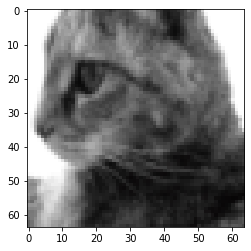

In [22]:
index = 23

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

given image is predicted as b'cat'


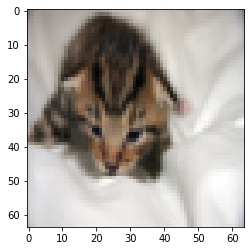

In [23]:
index = 1

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

given image is predicted as b'cat'


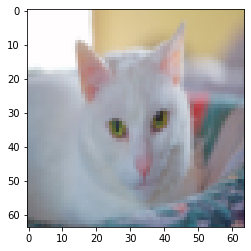

In [24]:
index = 2

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

given image is predicted as b'cat'


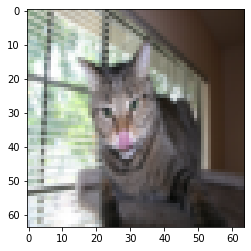

In [25]:
index = 20

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

given image is predicted as b'cat'


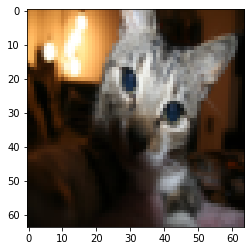

In [26]:
index = 40

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

In [27]:
test_set_flatten.shape

(12288, 50)

given image is predicted as b'cat'


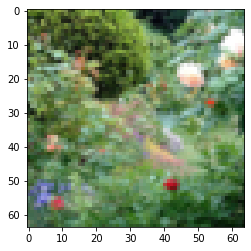

In [28]:
index = 49

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

given image is predicted as b'cat'


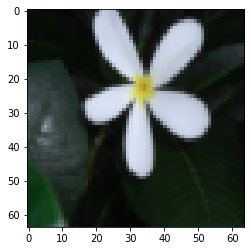

In [29]:
index = 39

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

given image is predicted as b'cat'


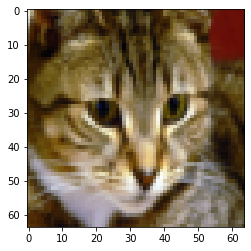

In [30]:
index = 15

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

given image is predicted as b'cat'


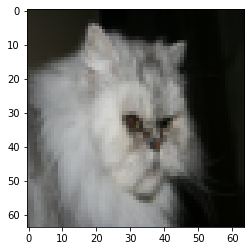

In [31]:
index = 10

plt.imshow(test_set_x_orig[index])
m = pred["test"][0,index]
m = int(m)
print("given image is predicted as", classes[m] )

In [32]:
pred["test"]


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])

In [33]:
pred["train"]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]])